# EN2550: Assignment 03 on Object Counting on a Conveyor Belt
### Connected Component Analysis
In this part, we will generate an indexed image representing connected components in conveyor_f101.png image. Notice that, as there are three square nuts and one hexagonal nut in the image, there will be five connected components (backgound will be assigned the label 0).
1. Open the hexnut_template.png, squarenut_template.png and conveyor_f100.png and display. This is done for you.

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

hexnut_template = cv.imread('hexnut_template.png', cv.IMREAD_COLOR)
squarenut_template =  cv.imread('squarenut_template.png', cv.IMREAD_COLOR)
conveyor_f100 =  cv.imread('conveyor_f100.png', cv.IMREAD_COLOR)
conveyor_f101 =  cv.imread('conveyor_f101.png', cv.IMREAD_COLOR)

fig, ax = plt. subplots(1,3)
ax[0].imshow(cv.cvtColor(hexnut_template, cv.COLOR_BGR2RGB))
ax[1].imshow(cv.cvtColor(squarenut_template, cv.COLOR_BGR2RGB))
ax[2].imshow(cv.cvtColor(conveyor_f100, cv.COLOR_BGR2RGB))
plt.show()

Convert the images to grayscale and apply Otsu's thresholding to obtain the binarized image. Do this for both the templates and belt images. State the threshold value (automatically) selected in the operation. Display the output images.

In [ ]:
# Otsu's thresholding after Gaussian filtering
images = [hexnut_template, squarenut_template, conveyor_f100, conveyor_f101]
titles = ["hexnut_template", "squarenut_template", "conveyor_f100", "conveyor_f101"]
binarized_images = []

fig,ax = plt.subplots(2,4, figsize = (15,15))

for i in range(len(images)):
    gray_image = cv.cvtColor(images[i], cv.COLOR_BGR2GRAY)
    blur = cv.GaussianBlur(gray_image,(5,5),0)
    threshold_value, binary_image = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
   
    binarized_images.append(binary_image) #Because later we want to call these images
    ax[0,i].imshow(cv.cvtColor(gray_image, cv.COLOR_BGR2RGB)) ; ax[0,i].set_title(titles[i]+"_grayscale")
    ax[1,i].imshow(cv.cvtColor(binary_image, cv.COLOR_BGR2RGB)) ; ax[1,i].set_title(titles[i]+"_binarized")
    print("Threshold for %s is %s"%(titles[i], threshold_value))
plt.show()
  

2. Carry out morphological closing to remove small holes inside the foreground. Use a 
3
×
3
 kernel.

In [ ]:
kernel = np.ones((3,3),np.uint8)
closed_binarized_images = []

fig, ax = plt.subplots(1,4, figsize = (20,20))

for i in range(len(images)):
    closing = cv.morphologyEx(binarized_images[i], cv.MORPH_CLOSE, kernel)
    closed_binarized_images.append(closing)
    ax[i].imshow(cv.cvtColor(closing, cv.COLOR_BGR2RGB))
    ax[i].set_title(titles[i]+"_closed_binarized")
plt.show()

Connected components analysis. 

In [ ]:
connected_components = []
fig, ax = plt.subplots(1,4,figsize = (20,20))

for i in range(4):
    retbal, labels, stats, centroids = cv.connectedComponentsWithStats(closed_binarized_images[i])
    colormapped = cv.applyColorMap((labels/np.amax(labels)*255).astype('uint8'), cv.COLORMAP_TURBO)
    connected_components.append(colormapped)
    ax[i].imshow(cv.cvtColor(colormapped,cv.COLOR_BGR2RGB))
    ax[i].set_title(titles[i]+"_connected_components")
    print(titles[i])
    print("Number of connected components in %s is %s."%(titles[i],np.shape(stats)[0]))
    print("Stats for %s=\n"%(titles[i]), stats)
    print("Centroids are as follows :")
    for j in range(len(centroids)):
        print('--> ', round(centroids[j][0],3),',', round(centroids[j][1],3))
        if j==len(centroids)-1: print('\n')
plt.show()

In [ ]:

colors = [(0,255,0),(0,0,255),(255,255,0),(255,0,255)]
thicknesses = [1,1,10,10]
contours_list = []

for i in range(4):
    thresh = 255 - closed_binarized_images[i]
    thresh = cv.cvtColor(thresh,cv.COLOR_RGB2BGR)
    thresh = cv.cvtColor(thresh, cv.COLOR_BGR2GRAY)
  
    cnts = cv.findContours(thresh, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
    cnts = cnts[0] if len(cnts) == 2 else cnts[1]
    black_background = np.zeros(np.shape(images[i]), dtype='uint8')

    contours_list.append(cnts)
    
    for j in range(len(cnts)):
        c = cnts[j]

        cv.drawContours(black_background, [c], -1, colors[j], thicknesses[i])
        
        
    fig, ax = plt.subplots(1,2, figsize = (7,7))
    ax[0].imshow(cv.cvtColor(thresh, cv.COLOR_RGB2BGR))
    ax[1].imshow(cv.cvtColor(black_background, cv.COLOR_RGB2BGR))
    plt.show()



### Detecting Objects on a Synthetic Conveyor
In this section, we will use the synthetic conveyor.mp4 sequence to count the two types of nuts.

In [ ]:
cv.namedWindow('Conveyor', cv.WINDOW_NORMAL)
cap = cv.VideoCapture('conveyor.mp4')
f = 0
frame = []      
while cap.isOpened():                                    
    ret, frame = cap.read()
    if not ret:
        print("Can't receive frame (stream end?). Exiting.")
        break

    f += 1
    text = 'Frame:' + str(f)
    cv.putText(frame,text , (100, 100), cv.FONT_HERSHEY_COMPLEX, 1, (255,0,0), 1, cv.LINE_AA)
    cv.imshow('Conveyor', frame)

    if cv.waitKey(1) == ord('q'):  
        break

cap.release()
cv.destroyAllWindows()


Count the number of matching hexagonal nuts in conveyor_f100.png.

Matching scores =  0.026486701348536812
Matching scores =  0.025849223429892154
Matching scores =  0.02584922343006335
Matching scores =  9.745595547006047e-06

Detected 1 match(es)


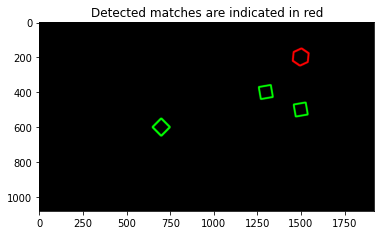

In [148]:
contours_of_1 = contours_list[0]   #contours related to image 0
contours_of_3 = contours_list[2]   #contours related to image 2

cnt1 = contours_of_1[0]    #image 0 has only one collection

black_background = np.zeros(np.shape(images[2]), dtype='uint8')

detected = 0
for cnt in contours_of_3: #iterate through items in the collection of contours for image 2
    ret = cv.matchShapes(cnt1,cnt,1,0.0)
    print("Matching scores = ",ret )
    
    if ret <= 0.001:
        detected += 1
        ww = cv.drawContours(black_background, [cnt], -1, [0,0,255], 10)
    else: 
        ww = cv.drawContours(black_background, [cnt], -1, [0,255,0], 10)

print("\nDetected %s match(es)"%(detected))
plt.imshow(cv.cvtColor(ww, cv.COLOR_BGR2RGB)) ; plt.title("Detected matches are indicated in red")
plt.show()


7
Matching scores =  0.0264867013483725
Matching scores =  0.5395022604606026
Matching scores =  0.02701632242024421
Matching scores =  0.02701632242122276
Matching scores =  0.02701632242122276
Matching scores =  0.20982790281695474
Matching scores =  0.02701632241730878

Detected 0 match(es)


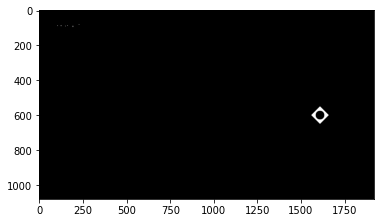

In [149]:
# cv.namedWindow('Conveyor', cv.WINDOW_NORMAL)
cap = cv.VideoCapture('conveyor.mp4')
f = 0
frame = []    
kernel = np.ones((3,3),np.uint8)  
while cap.isOpened():                                    
    ret, frame = cap.read()
    if not ret:
        print("Can't receive frame (stream end?). Exiting.")
        break

    f += 1
    text = 'Frame:' + str(f)
    cv.putText(frame,text , (100, 100), cv.FONT_HERSHEY_COMPLEX, 1, (255,0,0), 1, cv.LINE_AA)
    # cv.imshow('Conveyor', frame)

    if cv.waitKey(1) == ord('q'):  
        break
    
    gray_frame = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
    blur_frame = cv.GaussianBlur(gray_frame,(5,5),0)
    threshold_value, binary_frame = cv.threshold(blur_frame,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)

    closed_frame = cv.morphologyEx(binary_frame, cv.MORPH_CLOSE, kernel)
    thresh_frame = 255 - closed_frame
    thresh_frame = cv.cvtColor(thresh_frame,cv.COLOR_RGB2BGR)
    thresh_frame = cv.cvtColor(thresh_frame, cv.COLOR_BGR2GRAY)
    
    black_background = np.zeros(np.shape(frame), dtype='uint8')
    cnts_frame = cv.findContours(thresh_frame, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
    cnts_frame = cnts_frame[0] if len(cnts_frame) == 2 else cnts_frame[1]


    
    
    detected = 0
    if f==10:
        print(len(cnts_frame))
        for items in cnts_frame:
            ret = cv.matchShapes(cnt1,items,1,0.0)
            print("Matching scores = ",ret )
    
            if ret <= 0.001:
                detected += 1
                ww = cv.drawContours(black_background, [items], -1, [0,0,255], 10)
            else: 
                ww = cv.drawContours(black_background, [items], -1, [0,255,0], 10)
        print("\nDetected %s match(es)"%(detected))
        plt.imshow(cv.cvtColor(thresh_frame, cv.COLOR_BGR2RGB))
        break

cap.release()
cv.destroyAllWindows()